In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [1]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df=pd.read_csv('trainset.csv',sep=',')
df.head()

NameError: name 'pd' is not defined

In [5]:
df.shape

(5032, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5032 entries, 0 to 5031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5032 non-null   object 
 1   gender            5032 non-null   object 
 2   SeniorCitizen     5032 non-null   int64  
 3   Partner           5032 non-null   object 
 4   Dependents        5032 non-null   object 
 5   tenure            5032 non-null   int64  
 6   PhoneService      5032 non-null   object 
 7   MultipleLines     5032 non-null   object 
 8   InternetService   5032 non-null   object 
 9   OnlineSecurity    5032 non-null   object 
 10  OnlineBackup      5032 non-null   object 
 11  DeviceProtection  5032 non-null   object 
 12  TechSupport       5032 non-null   object 
 13  StreamingTV       5032 non-null   object 
 14  StreamingMovies   5032 non-null   object 
 15  Contract          5032 non-null   object 
 16  PaperlessBilling  5032 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5032.000000,5032.000000,5032.000000,5032.000000
mean,0.153617,34.322138,63.606747,2385.792379
std,0.360617,24.387365,30.554435,2288.859789
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,11.000000,29.450000,465.637500
50%,0.000000,32.000000,69.550000,1498.275000
75%,0.000000,57.000000,89.650000,3970.862500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
print(df.gender.value_counts())

Male      2565
Female    2467
Name: gender, dtype: int64


In [9]:
print(df.Partner.value_counts())

Yes    2532
No     2500
Name: Partner, dtype: int64


In [21]:
print(df.Dependents.value_counts())

No     3436
Yes    1596
Name: Dependents, dtype: int64


In [22]:
print(df.PhoneService.value_counts())

Yes    4546
No      486
Name: PhoneService, dtype: int64


In [23]:
print(df.MultipleLines.value_counts())

No                  2450
Yes                 2096
No phone service     486
Name: MultipleLines, dtype: int64


In [24]:
print(df.InternetService.value_counts())

Fiber optic    2051
DSL            1784
No             1197
Name: InternetService, dtype: int64


In [14]:
print(df.OnlineSecurity.value_counts())

No                     2285
Yes                    1550
No internet service    1197
Name: OnlineSecurity, dtype: int64


In [15]:
print(df.OnlineBackup.value_counts())

No                     2055
Yes                    1780
No internet service    1197
Name: OnlineBackup, dtype: int64


In [16]:
print(df.DeviceProtection.value_counts())

No                     2082
Yes                    1753
No internet service    1197
Name: DeviceProtection, dtype: int64


In [17]:
print(df.TechSupport.value_counts())

No                     2291
Yes                    1544
No internet service    1197
Name: TechSupport, dtype: int64


In [18]:
print(df.StreamingTV.value_counts())

No                     1923
Yes                    1912
No internet service    1197
Name: StreamingTV, dtype: int64


In [19]:
print(df.StreamingMovies.value_counts())

Yes                    1936
No                     1899
No internet service    1197
Name: StreamingMovies, dtype: int64


In [20]:
print(df.Contract.value_counts())

Month-to-month    2565
Two year          1342
One year          1125
Name: Contract, dtype: int64


In [25]:
print(df.PaperlessBilling.value_counts())

Yes    2895
No     2137
Name: PaperlessBilling, dtype: int64


In [35]:
print(df.PaymentMethod.value_counts())

2    1568
3    1201
0    1150
1    1113
Name: PaymentMethod, dtype: int64


In [4]:
print(df.Churn.value_counts())

No     4163
Yes     869
Name: Churn, dtype: int64


In [37]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,0.002175,-0.009267,0.009788,0.010331,-0.008435,-0.009458,0.010563,0.007694,-0.014519,-0.001962,0.008675,0.002553,-0.001303,0.006294,-0.005381,0.021416,-0.011664,0.004346,-0.016788
SeniorCitizen,0.002175,1.000000,0.025399,-0.208637,0.023008,0.010556,0.137441,-0.040442,-0.130047,-0.001110,-0.018651,-0.150710,0.020006,0.038080,-0.137382,0.147490,-0.043720,0.216236,0.109368,0.162587
Partner,-0.009267,0.025399,1.000000,0.456866,0.368881,0.016881,0.139267,-0.002421,0.140311,0.145237,0.154113,0.108978,0.133643,0.114455,0.283626,0.001041,-0.155077,0.095087,0.299866,-0.105431
Dependents,0.009788,-0.208637,0.456866,1.000000,0.145032,-0.012802,-0.021950,0.038830,0.138485,0.084898,0.065902,0.119591,0.050622,0.015783,0.222294,-0.096938,-0.036712,-0.112260,0.046471,-0.138532
tenure,0.010331,0.023008,0.368881,0.145032,1.000000,0.007134,0.347307,-0.045857,0.303120,0.361091,0.370885,0.295362,0.295308,0.292447,0.658699,0.031844,-0.366005,0.271856,0.813665,-0.287728
PhoneService,-0.008435,0.010556,0.016881,-0.012802,0.007134,1.000000,-0.024267,0.379638,-0.027349,0.022732,-0.004463,-0.025140,0.051585,0.048994,-0.004861,0.015795,-0.004110,0.222706,0.112010,0.014114
MultipleLines,-0.009458,0.137441,0.139267,-0.021950,0.347307,-0.024267,1.000000,-0.122989,0.006648,0.115419,0.118455,0.010345,0.177291,0.185793,0.109154,0.175880,-0.178010,0.446316,0.465982,0.046667
InternetService,0.010563,-0.040442,-0.002421,0.038830,-0.045857,0.379638,-0.122989,1.000000,-0.046659,0.033554,0.029892,-0.045284,0.089381,0.085673,0.092934,-0.158689,0.089656,-0.367518,-0.205813,-0.041207
OnlineSecurity,0.007694,-0.130047,0.140311,0.138485,0.303120,-0.027349,0.006648,-0.046659,1.000000,0.165053,0.161510,0.261385,0.037396,0.055122,0.354494,-0.143471,-0.079703,-0.034354,0.236581,-0.243775
OnlineBackup,-0.014519,-0.001110,0.145237,0.084898,0.361091,0.022732,0.115419,0.033554,0.165053,1.000000,0.184194,0.182986,0.141712,0.146583,0.262877,-0.010054,-0.115212,0.138263,0.371643,-0.164440


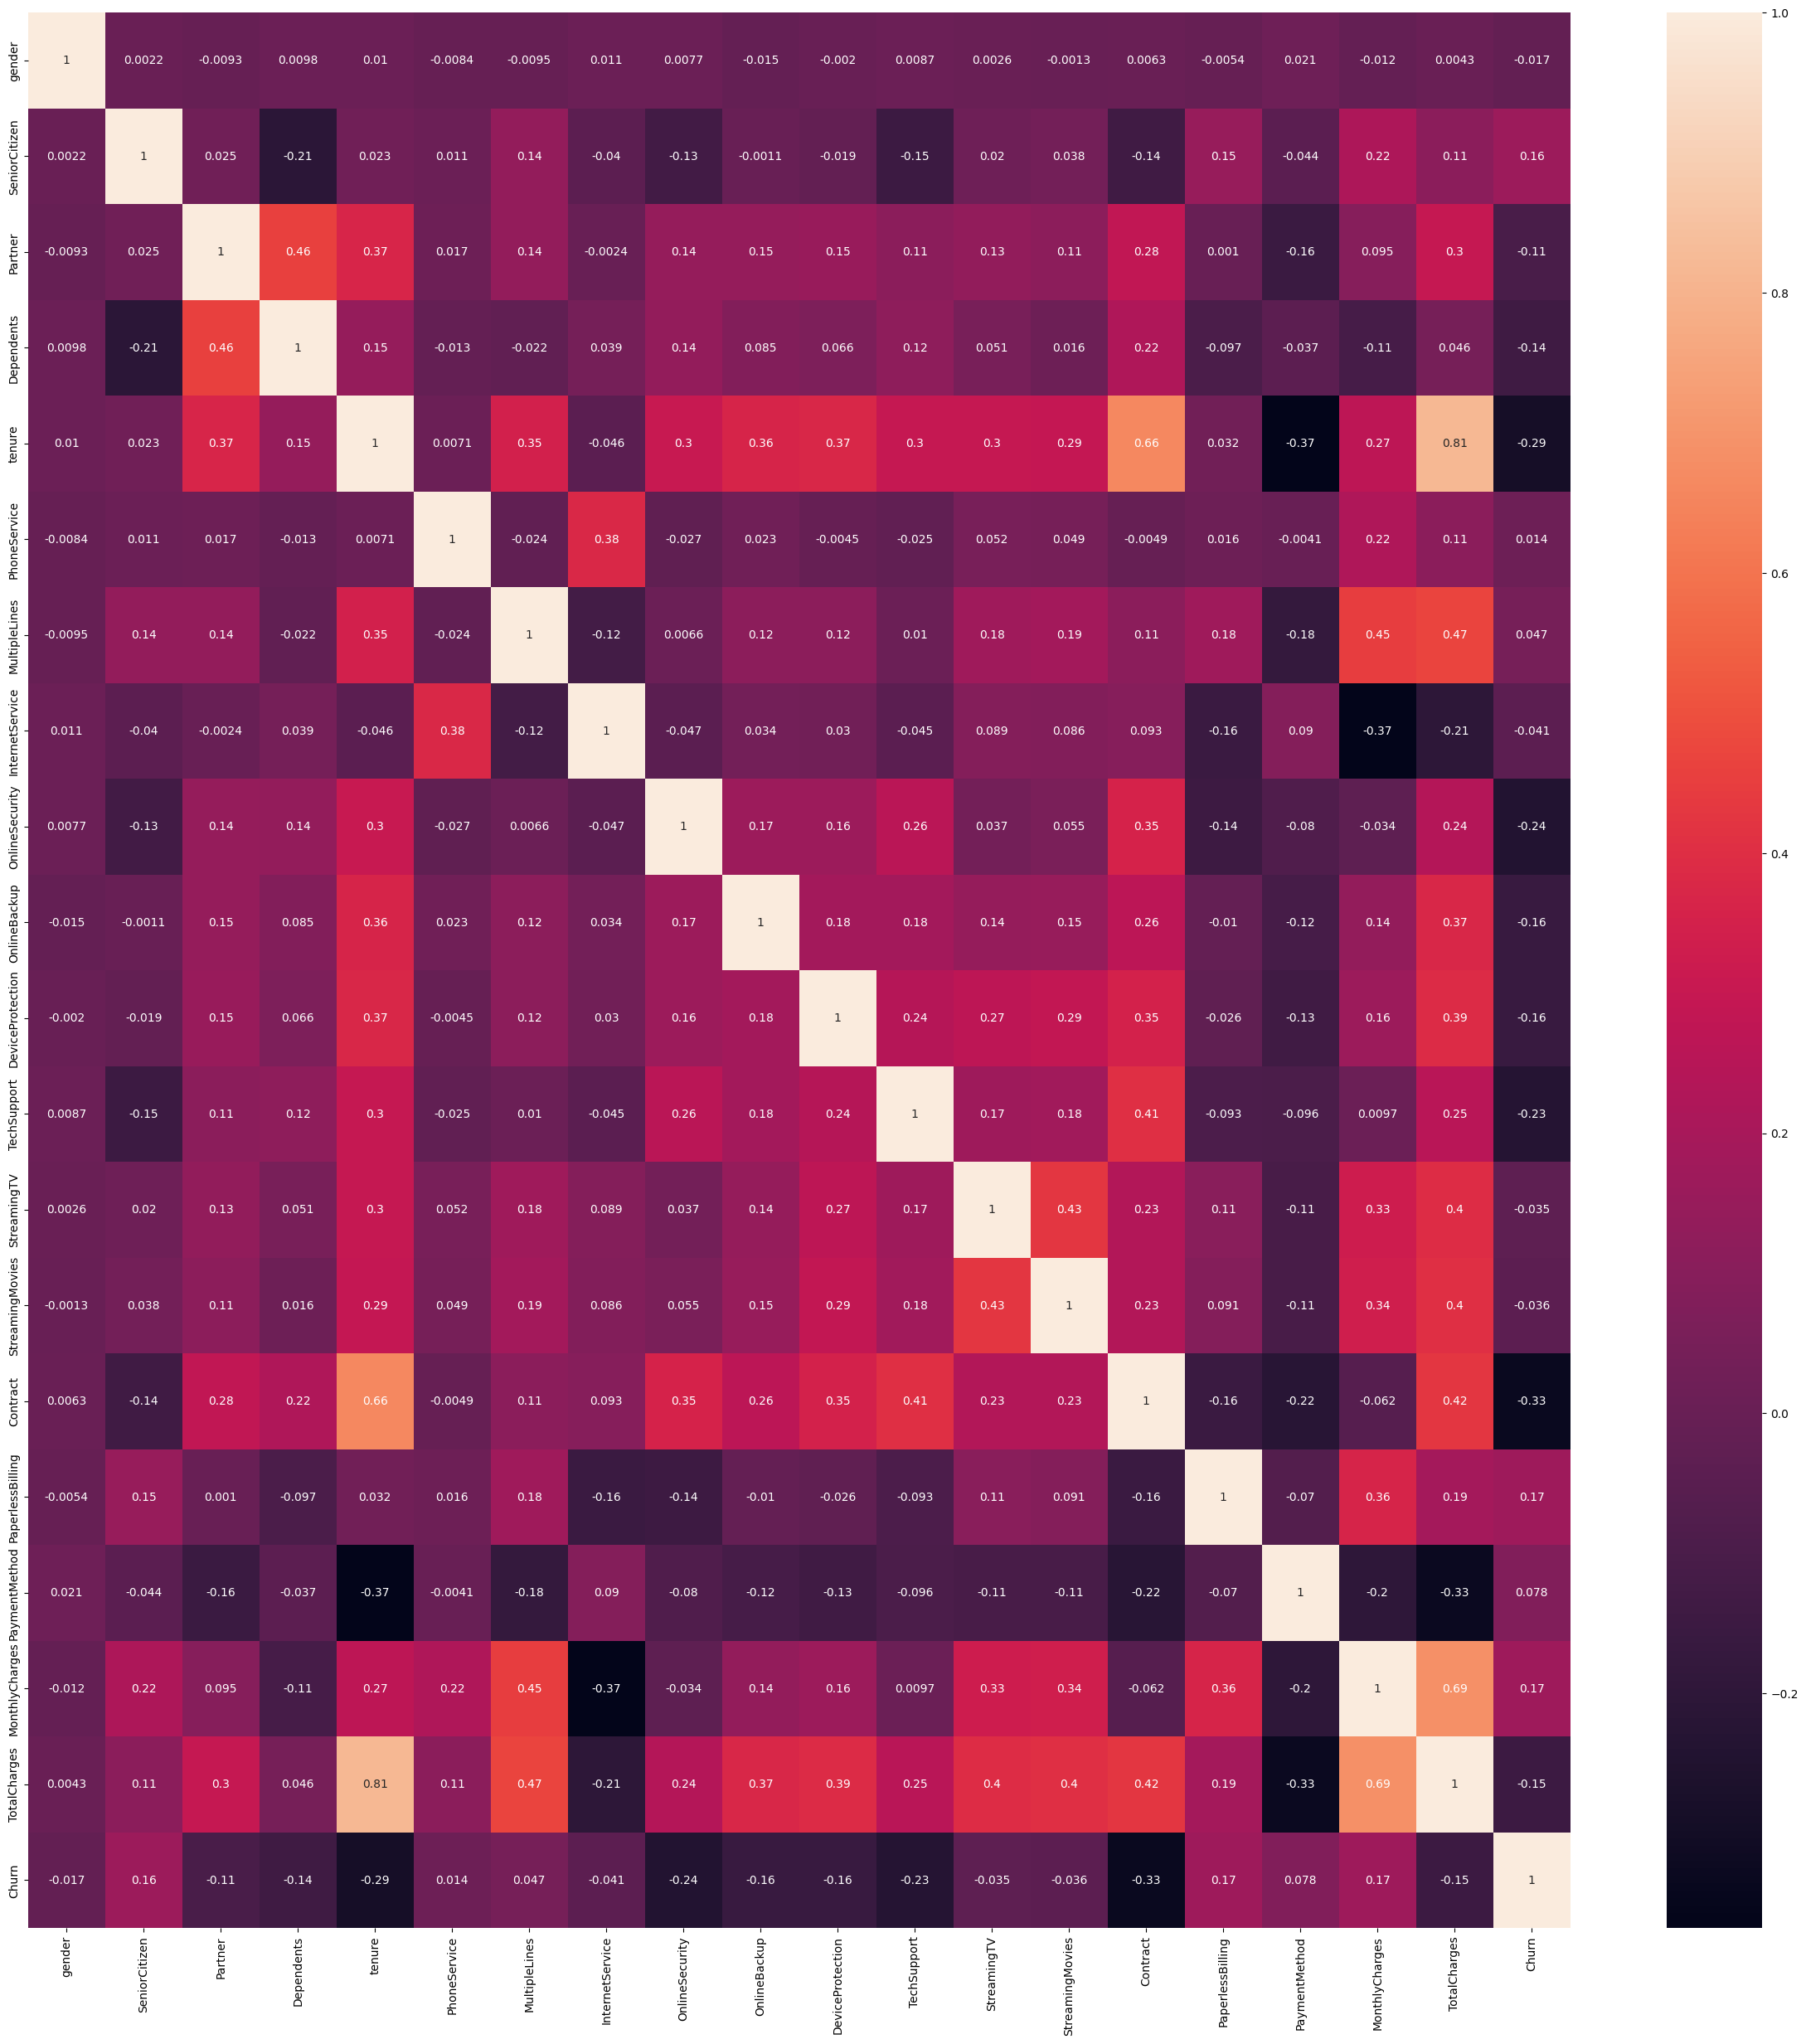

In [41]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

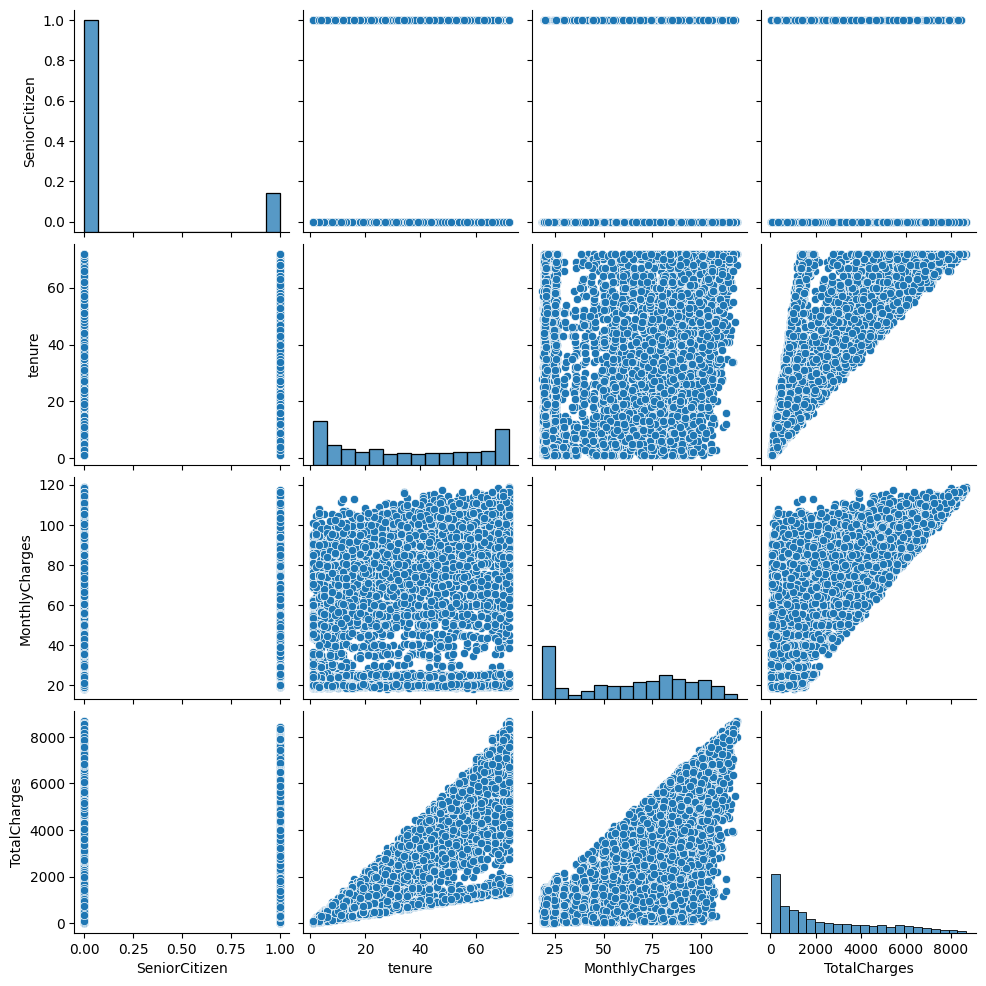

In [6]:
sns.pairplot(df)
plt.show()

In [2]:
ohe=OneHotEncoder()

In [3]:
print(ohe)

OneHotEncoder()


In [6]:
ohe.fit_transform(df[['MultipleLines','InternetService','OnlineSecurity']]).toarray()

array([[0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [7]:
featureArray=ohe.fit_transform(df[['MultipleLines','InternetService','OnlineSecurity']]).toarray()

In [8]:
ohe.categories_

[array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['DSL', 'Fiber optic', 'No'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object)]

In [ ]:
featureLabels=ohe.categories_